# Module 2: Text Normalisation - Preprocessing
<br>


## Table of Contents
<br>

<a href="#Module 2: Text Normalisation - Preprocessing"><font size="+1">Module 2: Text Normalisation - Preprocessing</font></a>
<ol>
  <li>What is Text Normalisation?</li>
  <li>Lowercasing</li>
  <li>Remove Punctuation</li>
  <li>Tokenize</li>
  <li>Lemmatization</li>
  <li>Stemming</li>
  <li>Stopword Removal</li>
  <li>Remove Numbers</li>
  <li>Remove the words having length less than 2</li>
  <li>Using Stanza</li>
  <li>Challenges</li>
</ol>

**Learning Outcomes:** 

* Explain the concept of normalisation, 

* Execute the following preprocessing steps to a dataset using nltk: 

    + Lowercase 

    + Tokenize 

    + Lemmatization 
    
    + Stemming 

    + Removing stop words and punctuation

    + Performing part-of-speech tagging. 
 
 
*  Differentiate between lemmatization and stemming. 
<br>

Additionally you should be able to:

* Execute tokenisation and lemmatisation using the Stanford Stanza library

<br>


In [ ]:
# Import the libraries used in this module
import nltk
nltk.data.path.append("../pre_course/nltk_data")
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.collocations import *
import string
import re
import stanza

In [ ]:
# Our data is stored in a pickle, a filetype that lets us store python objects
patents = pd.read_pickle('../data/Patent_Dataset.pkl')

In [ ]:
patents.head()

In [ ]:
# fix index
patents.index = [i for i in range(0, len(patents))]

In [ ]:
patents.head()

### 2.1 What is Text Normalisation?

<br>

Normalizing text means converting it to a more convenient, standard form. It aims to put all text on a level playing field. It requires being aware of what type of text is to be normalized and how it is to be processed afterwards; there is no all-purpose, one size fits all normalization procedure. 
<br>
To normalise text some key preprocessing steps could be undertaken, for example:-

<ul>
  <li>Lowercasing</li>
  <li>Removing all irrelevant characters (Numbers and Punctuation)</li>
  <li>Removing Stopwords</li>
  <li>Stemming</li>
  <li>Lemmatization</li>
</ul>

The above is often referred to as *cleaning* the text. It is also part of a NLP *pipeline*

<br>
Typically, the text also undergoes <span style="color:blue">tokenisation</span> to aid the normalisation process.
<br>

Once through preprocessing your text becomes more predictable and analyzable.  

The pre-processing steps undertaken depends on the task. It is not necessary to do any or all of the steps shown below. Though most tasks do undertake lowercasing as a bare minimum. 


### 2.2 Lowercasing
<br>
Lowercasing all the text data is one of the simplest and most effective forms of text normalisation. 

Lowercasing is applicable to most NLP tasks and significantly helps with consistency of the output.

It is useful because in a lot of applications where we are trying to capture meaning, capitalised words have the same meaning as those in lowercase. For example `Cat` (noun) at the beginning of a sentence is referring to the same thing as `cat` in the middle of a sentence.

<br>

In [ ]:
patents.loc[1,'abstract']

In [ ]:
# Function to lowercase input data
def lowercase(ptext):
    return ptext.lower()

In [ ]:
# Apply lowercasing function to all text within a column
patents['abstract'] = patents['abstract'].apply(lowercase)

In [ ]:
patents.loc[1,'abstract']

In [ ]:
# also often done in this manner
patents['abstract'] = patents['abstract'].str.lower()

### 2.3 Remove Punctuation
<br>
Punctuation is often irrelevant to the task at hand (such as counting word frequencies). By removing all or certain punctuation we remove the 'quirks' of individual sentences, standardising the text.

Python provides a constant called `string.punctuation` that provides a great list of punctuation characters. 

<br>

In [ ]:
print(string.punctuation)

In [ ]:
def remove_punct1(ptext):
    for each_punctuation_mark in string.punctuation:
          ptext = ptext.replace(each_punctuation_mark, "")
    return ptext

In [ ]:
# Below is an alternative function for the same purpose - computationally efficient using regex
def remove_punct2(ptext):
    ptext = re.sub(string=ptext,
                   pattern="[{}]".format(string.punctuation), 
                   repl="")
    return ptext

In [ ]:
patents.head()

In [ ]:
patents.loc[1,'abstract']

In [ ]:
patents['abstract_no_punct'] = patents['abstract'].apply(remove_punct2)

In [ ]:
patents.loc[1,'abstract_no_punct']

### 2.4 Tokenize
<br>
Tokenization is the process of splitting the given text into smaller pieces called tokens. Words, numbers, punctuation marks, and others can be considered as tokens. Tokenization makes it easier to process the text eg find its frequency. 

Tokenizers can range in complexity, from using `.spit(" ")` on text, to more rule based or machine learned implementations. Below we use `nltk`'s word tokenizer.

In [ ]:
# Function to tokenise text

def tokenisation(ptext):
    return nltk.word_tokenize(ptext)

In [ ]:
# Apply to 'abstract' column in dataframe
patents['abstract_tokens'] = patents['abstract'].apply(tokenisation)

In [ ]:
patents.loc[1,'abstract_tokens']

**Note: Line Segmentation**  

Text can also be split to identify sentences.

This can be done using the **sent_tokenize()** function from nltk.

In [ ]:
# Function to tokenize each string
def tokens_sentences(ptext):
    return nltk.sent_tokenize(ptext)

In [ ]:
# Apply tokenisation to abstract column in dataframe
patents['abstract_sentences'] = patents['abstract'].apply(tokens_sentences)

In [ ]:
patents.loc[1,'abstract']

In [ ]:
patents.loc[1,'abstract_sentences']

### 2.5 Lemmatization
<br>

Lemmatisation uses vocabulary and morphological analysis of words to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the <span style="color:blue"> lemma.</span>  Most lemmatisers achieve this using a lookup table and so this process, when you have large volumes of text may be slower than the alternative; stemming. However, it is often a recommended approach in a variety of applications due to it's accuracy.

Also, sometimes, the same word can have multiple different ‘lemma’s. So, based on the context it’s used in, you should identify the ‘part-of-speech’ (POS) tag for the word in that specific context and extract the appropriate lemma. POS tagging will be discussed in more detail in later modules.


<br>

**Lemmatization and Stemming:** Stemming operates on each word without considering the context and it cannot discriminate between different word meaning. Lemmatization, however, takes into account the part of speech and the context. Stemming is explained in more detail below.

Caring -> Lemmatization -> ‘Care’ 
<br>
Caring -> Stemming -> ‘Car’


**Example:**
 
*"better"*: has *"good"* as its lemma and "better" as its stem <br>
*"walking"*: has  *"walk"* as its lemma and stem <br>
*"meeting"*: can be either the base a noun or a verb depending on the context, eg *"in our last meeting"* or *"We are meeting again tomorrow"*. 
<br>
Lemmatization can select the appropriate lemma based on the context, unlike stemming.
<br>

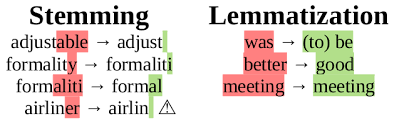

<br>


Stemming may be more useful in queries for databases whereas lemmazation may work much better when trying to determine text sentiment.

In [ ]:
patents.head()

In [ ]:
# Define the lemmatize() function

def lemmatise(ptokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in ptokens]

In [ ]:
patents['abstract_tokens_lemmatised'] = patents['abstract_tokens'].apply(lemmatise)

In [ ]:
patents.head()

In [ ]:
# Without lemmatisation
patents.loc[1,'abstract_tokens']

In [ ]:
# With lemmatisation
patents.loc[1,'abstract_tokens_lemmatised']

The above code is a simple example of how to use the wordnet lemmatizer on words and sentences.
Performance can be improved if we add the correct ‘part-of-speech’ tag (POS tag) as the second argument to lemmatize().
An example of this will be provided later.

### 2.6 Stemming
<br>
<span style="color:blue"> The process of reducing inflected (or sometimes derived) words to their word stem; that is, their base or root form.</span>  
<br>
For example, the words; *argue, argued, argues, arguing* reduce to the stem *argu*. Usually stemming is a crude heuristic process that chops off the ends of words in the hope of achieving the root correctly most of the time.

Stemming aims to remove the excess part of the word to be able to identify words that are similar.

There are different algorithms that can be used in the stemming process, but the most common in English is <span style="color:blue">Porter Stemmer.</span>  The rules contained in this algorithm are divided into different phases.The purpose of these rules is to reduce the words to their root.

The danger here lies in the possibility of overstemming where words like “universe” and “university” are reduced to the same root of “univers”.

In [ ]:
# Define stemming function

def stemming(ptoken):
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in ptoken]    

In [ ]:
patents['abstract_tokens_stemmed'] = patents['abstract_tokens'].apply(stemming)

In [ ]:
patents.head()

In [ ]:
patents.loc[5,'abstract_tokens_stemmed']

### 2.7 Stopword Removal

A stop word is a commonly used word (such as “the”, “a”, “an”, “in”). Stop words can be filtered from the text to be processed. There is no universal list of stop words in NLP, however the nltk module contains a list of stop words. Removal of stopwords can boost performance in machine learning classification tasks.

Stop word removal is commonly applied in search systems, text classification applications, topic modeling, topic extraction and others. Stop word lists can come from pre-established sets or you can create a custom one for your domain.

The reason this often works is because stopwords often do not add meaning to the sentence. For example if you wanted to work out what was important in the sentence below:

"The cat ate a mouse"

The same sentence without stopwords conveys most of the meaning:

"cat ate mouse"

In [ ]:
patents.head()

In [ ]:
# Display the stopwords given by nltk
print(stopwords.words('english'))

In [ ]:
# Define a function to remove stopwords from list of tokens

def clean_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [item for item in tokens if item not in stop_words]

In [ ]:
patents['abstract_tokens'] = patents['abstract_tokens'].apply(clean_stopwords)

In [ ]:
patents.head()

In [ ]:
patents.iloc[5,4]

### 2.8 Remove Numbers

Numerical values in text may not add any value to the analysis attempted. So, numbers can be removed from text. We can use regular-expressions (regex) to get rid of numbers. 

In [ ]:
patents.iloc[23,1]

In [ ]:
def remove_num(ptokens):
    return [token for token in ptokens if token.isalpha()]

In [ ]:
#another way using regular expression

In [ ]:
# function to remove numbers
def remove_num2(text):
    # define the pattern to keep
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)


In [ ]:
print(remove_num2("007 Not sure@ if this % was #fun! 558923 What do# you think** of it.? $500USD!"))

In [ ]:
print(" ".join(remove_num("007 Not sure@ if this % was #fun! 558923 What do# you think** of it.? $500USD!".split(" "))))

In [ ]:
patents['abstract_tokens'] = patents['abstract_tokens'].apply(remove_num)

In [ ]:
patents.loc[73,'abstract_tokens']

In [ ]:
patents.loc[73,'abstract_tokens']

### 2.9 Remove the words having length less than 2

Remove words with two or fewer characters from a document.This could be useful in removing further words that are "semantically empty"

In [ ]:
patents.head()

In [ ]:
def remove_short_tokens(ptokens):
    return [token for token in ptokens if len(token) > 2]

In [ ]:
patents['abstract_tokens'] = patents['abstract_tokens'].apply(remove_short_tokens)

In [ ]:
patents.head()

In [ ]:
patents.iloc[5,4]

In [ ]:
# Perform all the preprocessing steps wrapped into one function

In [ ]:
def preprocessing_with_lemmatisation(raw_data):
    """Function to perform all preprocessing steps with lemmatisation"""
    ptext = lowercase(raw_data)
    ptext = remove_punct1(ptext)
    ptext = tokenisation(ptext)
    ptext = lemmatise(ptext)
    ptext = remove_num(ptext)
    ptext = clean_stopwords(ptext)
    ptext = remove_short_tokens(ptext)

    return ptext

In [ ]:
def preprocessing_with_stemming(raw_data):
    """Function to perform all preprocessing steps with stemming"""
    ptext = lowercase(raw_data)
    ptext = remove_punct1(ptext)
    ptext = tokenisation(ptext)
    ptext = stemming(ptext)
    ptext = remove_num(ptext)
    ptext = clean_stopwords(ptext)
    ptext = remove_short_tokens(ptext)
        
    return ptext

In [ ]:
patents['processed_with_lem'] = patents['abstract'].apply(preprocessing_with_lemmatisation)

In [ ]:
patents['processed_with_stem'] = patents['abstract'].apply(preprocessing_with_stemming)

In [ ]:
patents.head()

In [ ]:
patents.head()

### 2.10 Using Stanza

Stanza is a Python natural language analysis package. It contains tools, which can be used in a pipeline, to convert a string containing human language text into lists of sentences and words, to generate base forms of those words, their parts of speech and morphological features, to give a syntactic structure dependency parse, and to recognize named entities. (Stanford University, 2020).
<br>

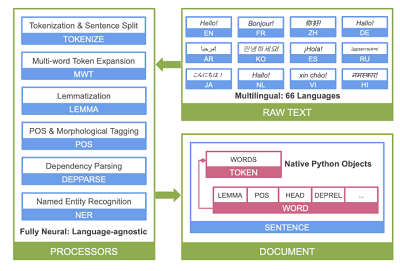

<br>

Some example on how to use stanza for language processing shown below - further examples highlighted in the language syntax and structure module.

#### Pipeline

To start annotating text with Stanza, you would typically start by building a Pipeline that contains Processors, each fulfilling a specific NLP task you desire (e.g., tokenization, part-of-speech tagging, syntactic parsing, etc). The pipeline takes in raw text or a Document object that contains partial annotations, runs the specified processors in succession, and returns an annotated Document.

#### Processors

Processors are units of the neural pipeline that perform specific NLP functions and create different annotations for a Document. The neural pipeline supports the following processors:

tokenize, mwt(expands multi word expressions), pos(part of speech), lemma, depparse(dependency parsing),
ner(named endtity recognition)


In [ ]:
# the English model download below requires ~0.5 Gb of memory
# For some networked devices the code below will not run.

In [ ]:

stanza.download('en') # download English model
nlp = stanza.Pipeline('en') # initialize English neural pipeline
doc = nlp("Barack Obama was born in Hawaii.") # run annotation over a sentence

In [ ]:
print(doc) 

In [ ]:
# Tokenisation and sentence splitting

In [ ]:
nlp = stanza.Pipeline(lang='en', processors='tokenize')
doc = nlp('This is a test sentence for stanza. This is another sentence.')

for index, sentence in enumerate(doc.sentences):
    print(f'====== Sentence {index+1} tokens =======')
    print(*[f'id: {token.id}\ttext: {token.text}' for token in sentence.tokens], sep='\n')

In [ ]:
# Lematisation

In [ ]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos,lemma')
doc = nlp('Barack Obama was born in Hawaii.')
print(*[f'word: {word.text+" "}\tlemma: {word.lemma}' for sent in doc.sentences for word in sent.words], sep='\n')

### 2.11 Challenges

As mentioned previously, with each processing technique there are challenges associated or areas where the technique performs poorly. It is important to be aware of what these could be for each step in your processing pipeline.
<br>

#### 2.12 Punctuation
Words like Ph.D that have a ., but the sentence does not finish would require an exception function. Additionally words like "don't", "won't" also need to be handled with caution.

#### 2.13 Consistency
Using different methods for lemmatization may give different results- staying consistent throughout your work will ease your processing and will not mess with your results

#### 2.14 Stemming
Usually stemming is not preferred. If you do want to use stemming to help you find more words that are closely related, then it would be better if you keep the stemmised and the non-stemmised version of the word. This will help you present the results as the end.


<br>

#### Exercises
<br>

<ol>
  <li>Import the Hep Dataset and perform the following preprocessing steps to the "Text" column.</li>
    
        Lowercasing
        Remove Punctuation
        Tokenize
        Lemmatization
        Stemming
        Stopword Removal
        Remove Numbers
        Remove the words having length less than 2
        Tokenise, sentence splitting and lemmatisation using Stanza
 
</ol>

Guidelines: 

* Change the "Text" columnn from list to a string before undertaking pre-processing.  <br>
* Perform the preprocessing steps in the same way as done to the patent dataset abstract column. <br>
* Once punctuation removal, tokenisation, lemmatisation, stemming undertaken put the results in new columns in the df. <br> 
* Apply lemmatisation and stemming on text that has been tokenised <br> 
* Make a copy of the df once loaded in using copy() <br>
* Use Stanza on limited data 

hep2 = hep.copy()


In [ ]:
hep = pd.read_pickle("../data/Hep_Dataset.pkl")

In [ ]:
hep.head()

In [ ]:
hep.shape

In [ ]:
# Write your code here


#### References


https://mc.ai/text-preprocessing-for-nlp-and-machine-learning-tasks/